# Picking out minima using weighted graph

Extract paths from graph to feed into AI

## Initial Graph setup

In [1]:
#import libraries
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in data files
min_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/min.data', header=None, sep='\s+')
ts_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/ts.data', header=None, sep='\s+')
print(min_data.shape, ts_data.shape)

(1621, 6) (1674, 8)


In [3]:
from collections import defaultdict
#slice out free energy values and indexes
min_energy = min_data[0]
min_energy.index +=1

ts_index = ts_data[[3,4]]
ts_energy = ts_data[[0]]
ts_index.index +=1
ts_energy.index +=1


In [4]:
#add extra row with dummy data to ts indexing data to ensure indexing consistency
ts_index.loc[0] = [0,0]
ts_index.sort_index(inplace=True) 
ts_index

C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\3029229872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_index.loc[0] = [0,0]
C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\3029229872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_index.sort_index(inplace=True)


,3,4
0,0,0
1,4,1
2,5,6
3,7,8
4,9,10
...,...,...
1670,1615,1616
1671,1617,1618
1672,1323,1084
1673,1619,1620


In [5]:
#add extra row with dummy data to ts energy data to ensure indexing consistency
ts_energy.loc[0] = [np.nan]
ts_energy.sort_index(inplace=True) 
ts_energy = list(zip(ts_energy[0]))
ts_energy

C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\4162652306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_energy.loc[0] = [np.nan]
C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\4162652306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_energy.sort_index(inplace=True)


[(nan,),
 (-6873.634398168551,),
 (-6853.75404977499,),
 (-6860.489376341518,),
 (-6860.942934237704,),
 (-6865.165206140573,),
 (-6860.988071828986,),
 (-6880.590688826697,),
 (-6879.383138501547,),
 (-6879.53869032511,),
 (-6862.940435221228,),
 (-6869.8197786397,),
 (-6864.959136713897,),
 (-6863.582712420446,),
 (-6874.839575591701,),
 (-6877.12981508046,),
 (-6876.820931557131,),
 (-6880.280018477348,),
 (-6882.517269761304,),
 (-6879.807938818418,),
 (-6878.365139834084,),
 (-6876.218405567803,),
 (-6857.321660543012,),
 (-6865.786675337913,),
 (-6861.2289857839405,),
 (-6861.935539438554,),
 (-6862.656953422758,),
 (-6861.688565993403,),
 (-6866.489612030897,),
 (-6877.624806685873,),
 (-6877.62377192047,),
 (-6878.1951003696,),
 (-6874.468914467756,),
 (-6883.851686878848,),
 (-6881.972323856747,),
 (-6877.932879161761,),
 (-6884.95576242036,),
 (-6877.757270983928,),
 (-6879.339155999066,),
 (-6879.916247704253,),
 (-6862.486380573047,),
 (-6881.179601190292,),
 (-6865.3703808

In [6]:
# igraph uses vertices and edge IDs, not actual values so use index as IDs
from igraph import Graph
g = Graph()
g = Graph.DataFrame(ts_index, directed=False)
print(g)

IGRAPH U--- 1622 1675 --
+ edges:
0--0 1--4 5--6 7--8 9--10 11--12 13--14 15--16 17--18 19--20 21--22 23--24
25--26 27--28 29--30 31--32 1--33 4--34 16--35 36--37 38--39 9--40 41--42
12--25 8--43 43--44 44--45 7--13 14--28 27--46 46--47 48--49 30--50 32--50
16--51 52--53 34--35 2--54 54--55 18--55 10--56 17--57 10--58 59--60 61--62
12--63 11--45 47--49 29--64 48--64 33--65 66--67 17--68 39--40 69--70 14--71
72--73 74--75 66--74 65--76 77--78 19--79 22--80 81--82 83--84 85--86 87--88
62--89 90--91 92--93 94--95 45--71 53--96 16--72 15--73 34--97 55--98 78--98
19--78 99--100 21--101 102--103 42--104 105--106 92--107 95--107 26--93 26--63
80--108 21--109 110--111 41--112 113--114 115--116 117--118 61--119 46--120
31--121 96--121 122--123 124--125 126--127 128--129 130--131 132--133 134--135
136--137 1--137 134--138 139--140 141--142 143--144 145--146 147--148 149--150
151--152 153--154 155--156 157--158 159--160 34--161 162--163 164--165
166--167 140--168 169--170 171--172 143--173 174--1

In [7]:
#assign minima energy to the verticies
for i in range(1,(len(min_energy)+1)):
    g.vs[i]["energy"] = [min_energy[i]]

In [8]:
#calculate edge weights
edge_weights = list()
for i in range (1, (len(ts_index))):
    temp = abs(ts_energy[i]-(np.nanmin(min_energy)))
    edge_weights.append(temp)

#insert a zero to weight the dummy edge
edge_weights.insert(0, np.float64(0))
edge_weights

[np.float64(0.0),
 array([21.32399831]),
 array([41.2043467]),
 array([34.46902014]),
 array([34.01546224]),
 array([29.79319034]),
 array([33.97032465]),
 array([14.36770765]),
 array([15.57525798]),
 array([15.41970615]),
 array([32.01796126]),
 array([25.13861784]),
 array([29.99925977]),
 array([31.37568406]),
 array([20.11882089]),
 array([17.8285814]),
 array([18.13746492]),
 array([14.678378]),
 array([12.44112672]),
 array([15.15045766]),
 array([16.59325665]),
 array([18.73999091]),
 array([37.63673594]),
 array([29.17172114]),
 array([33.7294107]),
 array([33.02285704]),
 array([32.30144306]),
 array([33.26983049]),
 array([28.46878445]),
 array([17.33358979]),
 array([17.33462456]),
 array([16.76329611]),
 array([20.48948201]),
 array([11.1067096]),
 array([12.98607262]),
 array([17.02551732]),
 array([10.00263406]),
 array([17.2011255]),
 array([15.61924048]),
 array([15.04214878]),
 array([32.47201591]),
 array([13.77879529]),
 array([29.58801566]),
 array([23.22432781]),


In [9]:
#loop to assign weights to each edge/transition state
for i in range (0, (len(ts_energy))):
    g.es[i]["weight"] = [edge_weights[i]]

In [10]:
#check if graph is now weighted
g.is_weighted()

True

## Randomly selecting minima

<function matplotlib.pyplot.show(close=None, block=None)>

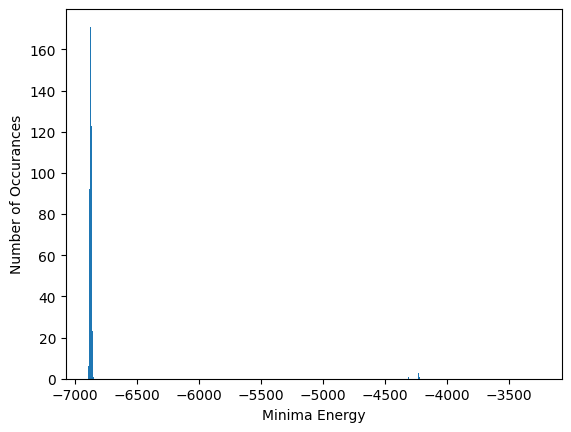

In [11]:
# histogram of minima energy distribution, focusing on the main cluster
plt.hist(min_energy, bins=1621)
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.show

In [12]:
#function for randomly picking out a given number of minima pairs
import random
import itertools

def image_generator(iterable, groups, samplesize):
    grouped = (i for i in itertools.product(iterable,repeat=groups) if i[0]!=i[1])
    return random.sample(list(grouped), samplesize)

sample = image_generator(min_energy, 2, 50)
print(sample)

[(-6871.826453580123, -6880.419384031109), (-6881.685194068363, -6878.1627630699), (-6878.469974044707, -6866.482801091091), (-6866.27651015302, -6868.653942319501), (-6883.974570391152, -6881.685194068363), (-6872.075724561131, -6864.174490271118), (-6867.269241265332, -6871.054782146164), (-6879.4697261370575, -6886.243504750533), (-4862.895486756232, -6878.996390590371), (-6876.010479702372, -6884.101143143777), (-6875.781767232536, -6885.427144007333), (-6874.136390428003, -6880.41230841067), (-6872.8086940838575, -6880.993816332526), (-6887.971741096985, -6875.450667272806), (-6857.007652411594, -6865.189941221146), (-6870.25212880682, -6871.759188717634), (-6880.768755788246, -6870.053144079791), (-6879.411828107973, -6884.637070939073), (-6879.900026400212, -6871.572871237971), (-6877.321780384728, -6880.720522464212), (-6876.989972091822, -6881.556106883556), (-6869.416192853105, -6870.33159914636), (-6869.603447845321, -6878.627790426799), (-6876.124668459677, -6872.7348475711

In [13]:
#splitting selected pairs into 1st half and 2nd half for graphing and calculation later
sample1 = list(list(zip(*sample))[0])
sample2 = list(list(zip(*sample))[1])

<Axes: title={'center': 'Energy levels for each chosen pair'}, xlabel='Minima Pair', ylabel='Energy'>

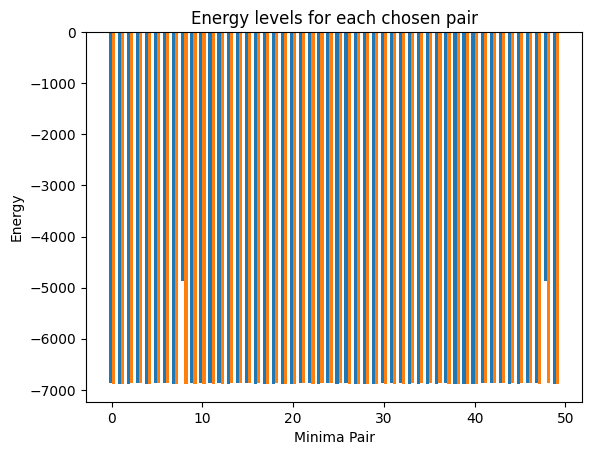

In [14]:
#plotting the energy levels of the chosen pairs
xx, yy = zip(*sample)
group_labels = list(range(0, len(sample)))
x = np.arange(len(group_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xx, width)
rects2 = ax.bar(x + width/2, yy, width)
ax.set_title('Energy levels for each chosen pair')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy')
ax

In [15]:
#loop to find the energy differences between each pair
energy_diff=list()
for i in range(0,len(sample)):
    temp = abs(sample1[i]-sample2[i])
    energy_diff.append(temp)

energy_diff

[8.592930450986387,
 3.5224309984623687,
 11.98717295361621,
 2.377432166480503,
 2.289376322789394,
 7.901234290013235,
 3.7855408808318316,
 6.77377861347577,
 2016.10090383414,
 8.090663441405013,
 9.645376774796205,
 6.275917982667124,
 8.18512224866845,
 12.521073824179439,
 8.18228880955212,
 1.5070599108139504,
 10.715611708455071,
 5.225242831100331,
 8.32715516224016,
 3.3987420794837817,
 4.56613479173393,
 0.9154062932548186,
 9.024342581477867,
 3.38982088856028,
 7.453371744861215,
 10.168429932113213,
 13.739589871996031,
 0.27238891845445323,
 3.043570677948992,
 2.315615332964626,
 20.095016894325454,
 5.392221708439138,
 14.168894501689465,
 13.629146117456003,
 21.553357550795226,
 15.527134263322296,
 18.78509834192846,
 9.96155502882084,
 0.7328018769167102,
 0.3250422324590545,
 0.3135047814757854,
 0.15895703928799776,
 7.173810925033649,
 4.184186567793404,
 9.756892145047459,
 20.057355846882274,
 9.96280401097465,
 8.388735872787038,
 2003.2376194531143,
 0.945

In [16]:
#filter that removes energy values greater than 150 from the energy differences
for i in range(0, 50):
    if abs(energy_diff[i]) > 150:
        print(energy_diff[i])
        sample.remove(sample[i])
        sample1.remove(sample1[i])
        sample2.remove(sample2[i])
        energy_diff.remove(energy_diff[i])
    else:
        break

Text(0, 0.5, 'Number of Occurances')

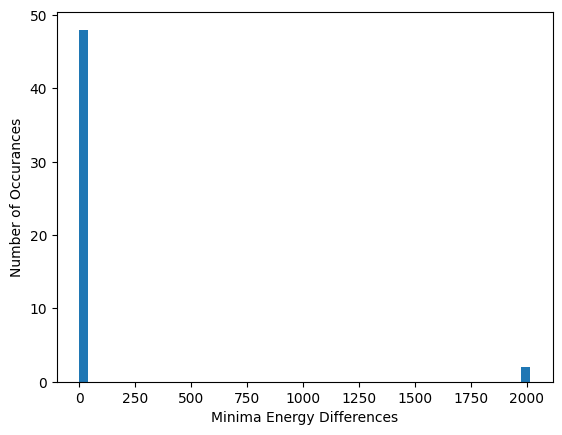

In [17]:
#histogram/distribution of energy differences between each pair
plt.hist(energy_diff, bins=50)
plt.xlabel("Minima Energy Differences")
plt.ylabel("Number of Occurances")
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

<Axes: title={'center': 'Energy differences for each chosen pair'}, xlabel='Minima Pair', ylabel='Energy Difference'>

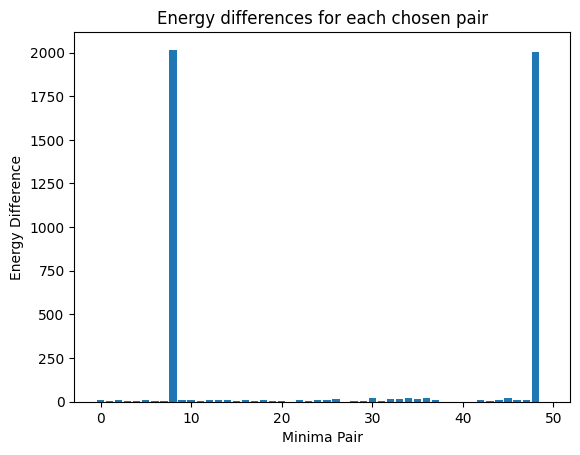

In [18]:
#plotting the energy differences for each pair
group_labels = list(range(0, len(energy_diff)))
x = np.arange(len(group_labels))

fig, ax = plt.subplots()
ax.bar(group_labels, energy_diff)
ax.set_title('Energy differences for each chosen pair')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy Difference')
ax

## Extracting Paths

In [19]:
#match energies from chosen minima pairs with original min energy and get indicies
start = [i for i, item in enumerate(min_energy) if item in sample1]
end = [i for i, item in enumerate(min_energy) if item in sample2]

In [20]:
#getting list of edges and verticies for the shortest paths 
edge_paths = list()
vertex_paths = list()
for i in range(0, len(sample1)):
    e_results = g.get_shortest_paths(v=start[i], to=end, weights=edge_weights, output="epath")
    v_results = g.get_shortest_paths(v=start[i], to=end, weights=edge_weights, output="vpath")
    edge_paths.append(e_results)
    vertex_paths.append(v_results)

C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\1806540375.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e_results = g.get_shortest_paths(v=start[i], to=end, weights=edge_weights, output="epath")
C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\1806540375.py:5: RuntimeWarning: Couldn't reach some vertices. at src/paths/dijkstra.c:534
  e_results = g.get_shortest_paths(v=start[i], to=end, weights=edge_weights, output="epath")
C:\Users\ckcho\AppData\Local\Temp\ipykernel_25196\1806540375.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_results = g.get_shortest_paths(v=start[i], to=end, weights=edge_weights, output="vpath")
C:\U

In [21]:
#function to flatten lists of lists
def flatten(xss):
    return [x for xs in xss for x in xs]
#the output of the for previous for loop it a list of list of lists so we need to flatten it out
edge_paths = flatten(edge_paths)
vertex_paths = flatten(vertex_paths)

In [22]:
#remove all empty lists from the list of lists
edge_paths = [x for x in edge_paths if x != []]
vertex_paths = [x for x in vertex_paths if x != []]
print(edge_paths)
print(vertex_paths)

[[1195, 1189, 1182, 1196, 1190, 1193, 1184, 1183, 1178, 1185, 1177, 1186, 1188, 1187, 1385, 1200, 842, 839, 215, 241, 302, 303, 132, 305, 304, 242, 243, 313, 246, 323, 582, 584, 583, 1346, 1347, 1345, 1353, 1349, 1358, 1348, 1354, 1351, 1350, 1342, 1355, 1372, 1373, 1374, 1369, 1382, 353, 352, 310, 101, 168, 169, 146, 171, 224, 311, 200, 225, 201, 170, 144, 172, 259, 269, 342, 345, 249, 266, 272, 271, 250, 264, 270, 378, 389, 390, 388, 372, 398, 380, 405, 404, 403, 402], [1195, 1189, 1182, 1196, 1190, 1193, 1184, 1183, 1178, 1185, 1177, 1186, 1188, 1187, 1385, 1200, 842, 839, 215, 241, 302, 303, 132, 305, 304, 242, 243, 313, 246, 323, 582, 584, 583, 1346, 1347, 1345, 1353, 1349, 1358, 1348, 1354, 1351, 1350, 1342, 1355, 1372, 1373, 1374, 1369, 1382, 353, 352, 310, 101, 168, 169, 146, 171, 224, 311, 200, 225, 201, 170, 144, 172, 259, 269, 342, 345, 249, 266, 272, 271, 250, 264, 270, 265, 252, 253, 258, 275, 312, 276, 278, 273, 263, 78, 9, 365, 359, 88], [86, 69, 84, 85, 70], [1195, 1189

In [23]:
x = 0
verticies = list()
for i in vertex_paths:
    if i[0] == start[0]:
        verticies.append(i)
        x = x+1
print (verticies)
print(x)

[[26, 1073, 1075, 1076, 1079, 1080, 1072, 1077, 1069, 1070, 1067, 1068, 1065, 1078, 1064, 1084, 770, 765, 253, 275, 218, 342, 180, 181, 343, 294, 293, 295, 276, 299, 349, 561, 559, 562, 1259, 1258, 1257, 1262, 1263, 1260, 1261, 1254, 1264, 1251, 1252, 1265, 1281, 1272, 1277, 1278, 193, 369, 344, 126, 127, 227, 201, 202, 229, 283, 262, 261, 263, 228, 198, 197, 3, 314, 319, 300, 303, 302, 323, 325, 305, 304, 321, 322, 388, 402, 401, 376, 382, 392, 391, 408, 407, 406, 40], [26, 1073, 1075, 1076, 1079, 1080, 1072, 1077, 1069, 1070, 1067, 1068, 1065, 1078, 1064, 1084, 770, 765, 253, 275, 218, 342, 180, 181, 343, 294, 293, 295, 276, 299, 349, 561, 559, 562, 1259, 1258, 1257, 1262, 1263, 1260, 1261, 1254, 1264, 1251, 1252, 1265, 1281, 1272, 1277, 1278, 193, 369, 344, 126, 127, 227, 201, 202, 229, 283, 262, 261, 263, 228, 198, 197, 3, 314, 319, 300, 303, 302, 323, 325, 305, 304, 321, 322, 306, 308, 309, 310, 328, 330, 329, 326, 320, 78, 19, 20, 370, 108, 80], [26, 93, 92, 107, 95, 94], [26, 10

In [24]:
min_energy[405]

np.float64(-6881.024980227891)

In [25]:
minima = list()
for i in verticies:
    minima.append(min_energy[i])
type(minima[5])

pandas.core.series.Series

In [26]:
ts_energy = pd.Series(ts_energy)

In [27]:
tstates = list()
for i in range(0,x):
    _ = edge_paths[i]
    tstates.append(ts_energy[_])
tstates[5]

1195     (-6873.427790570504,)
1189      (-6873.17088591876,)
1182     (-6873.085194839712,)
1196     (-6878.827225800704,)
1190    (-6879.3384550640585,)
1193     (-6883.903942253241,)
1184     (-6883.947538575653,)
1183      (-6882.60226930518,)
1178    (-6881.1037569408645,)
1185     (-6885.216604162688,)
1177     (-6883.903169926526,)
1186    (-6883.9399131706405,)
1188     (-6883.931924909346,)
1187     (-6878.250557100533,)
1385     (-6879.620184242702,)
1200     (-6875.322061588219,)
842      (-6873.571369927016,)
867      (-6873.553579452586,)
846      (-6875.287147651521,)
869     (-6874.6339455730285,)
876      (-6874.899768447825,)
877      (-6874.996031132838,)
866       (-6874.58889276252,)
865     (-6875.0326897916175,)
864      (-6875.277585099648,)
844     (-6866.4287339369275,)
847      (-6864.742638411722,)
836      (-6864.378874675486,)
dtype: object